In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Sales_Data.xlsx')

In [3]:
df.dtypes

ORDERNUMBER               int64
QUANTITYORDERED           int64
PRICEEACH               float64
ORDERLINENUMBER           int64
SALES                   float64
ORDERDATE                 int64
DAYS_SINCE_LASTORDER      int64
STATUS                   object
PRODUCTLINE              object
MSRP                      int64
PRODUCTCODE              object
CUSTOMERNAME             object
PHONE                    object
ADDRESSLINE1             object
CITY                     object
POSTALCODE               object
COUNTRY                  object
CONTACTLASTNAME          object
CONTACTFIRSTNAME         object
DEALSIZE                 object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   int64  
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [5]:
# Check the number of Null values in the data
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [6]:
#Unique values in each column
df.nunique()

ORDERNUMBER              298
QUANTITYORDERED           58
PRICEEACH               1844
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
PHONE                     88
ADDRESSLINE1              89
CITY                      71
POSTALCODE                73
COUNTRY                   19
CONTACTLASTNAME           76
CONTACTFIRSTNAME          72
DEALSIZE                   3
dtype: int64

In [7]:
#Number of countries and orders in them
df['COUNTRY'].value_counts()

USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: COUNTRY, dtype: int64

<AxesSubplot:xlabel='SALES', ylabel='Count'>

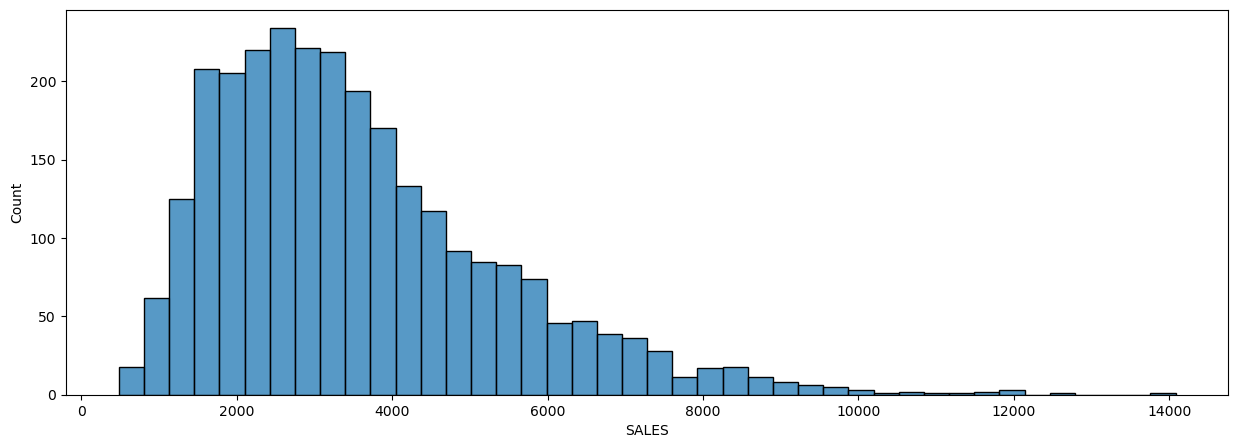

In [8]:
#Univariate Analysis  'SALES'.
data = df['SALES']

figure = plt.figure(figsize=(15,5))
sns.histplot(data)

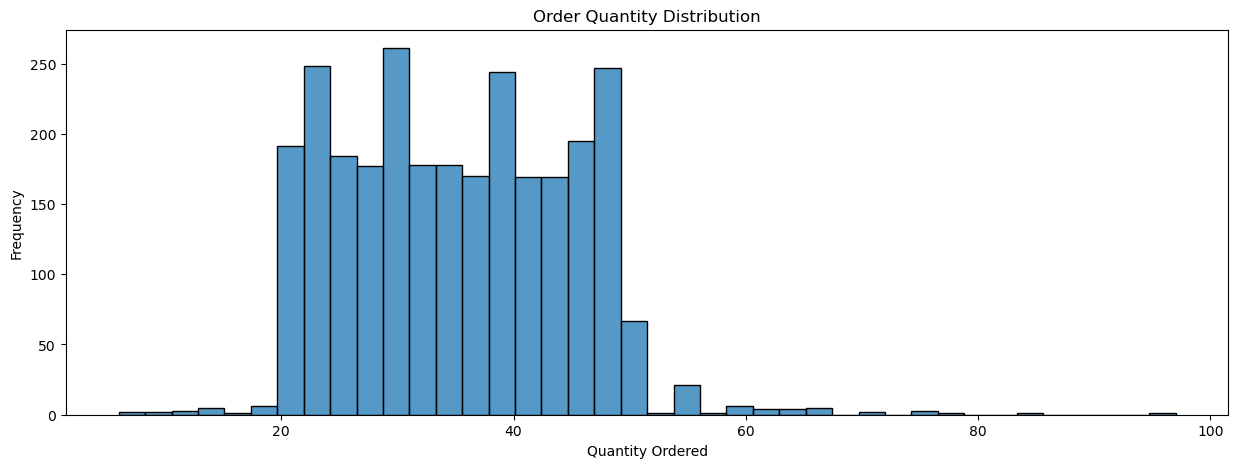

In [9]:
#Plot for Quantity Ordered
figure = plt.figure(figsize=(15,5))
sns.histplot(df['QUANTITYORDERED'])
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

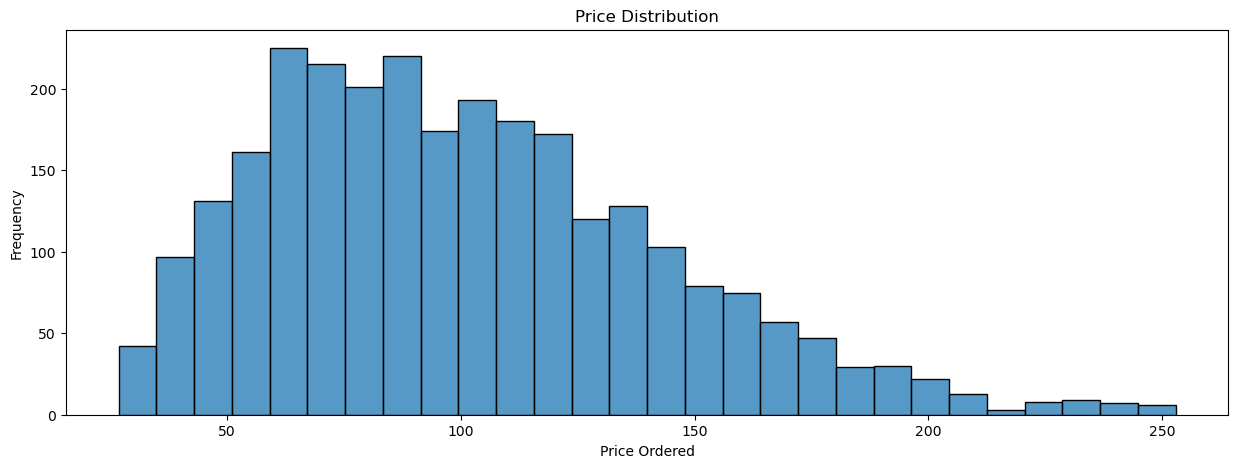

In [10]:
#Plot for Price Distribution
figure = plt.figure(figsize=(15,5))
sns.histplot(df['PRICEEACH'])
plt.title('Price Distribution')
plt.xlabel('Price Ordered')
plt.ylabel('Frequency')
plt.show()

In [11]:
df['PRICEEACH'].median()

95.55

In [12]:
#Status based calculation
df['STATUS'].value_counts(normalize = True)*100

Shipped       92.500910
Cancelled      2.184201
Resolved       1.710957
On Hold        1.601747
In Process     1.492537
Disputed       0.509647
Name: STATUS, dtype: float64

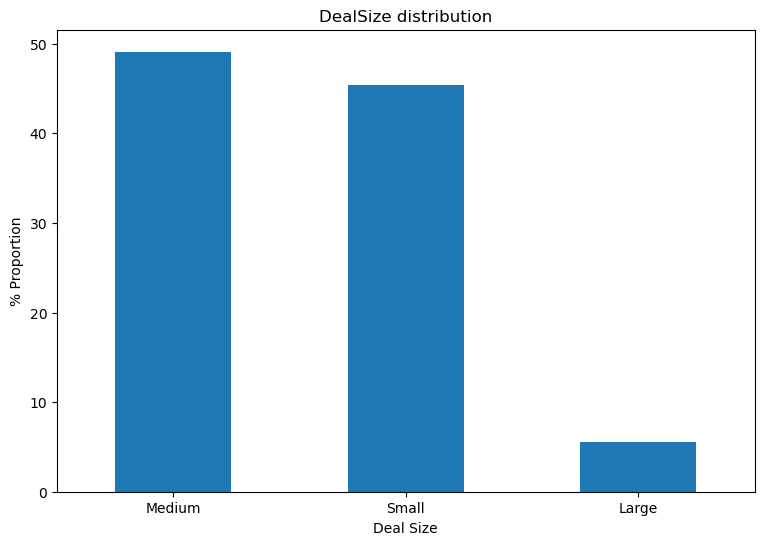

In [13]:
#Deal size plot
plt.figure(figsize=(9,6))
df['DEALSIZE'].value_counts(normalize=True).mul(100).plot(kind='bar', rot=0)
plt.title('DealSize distribution')
plt.xlabel('Deal Size')
plt.ylabel('% Proportion')
plt.show()

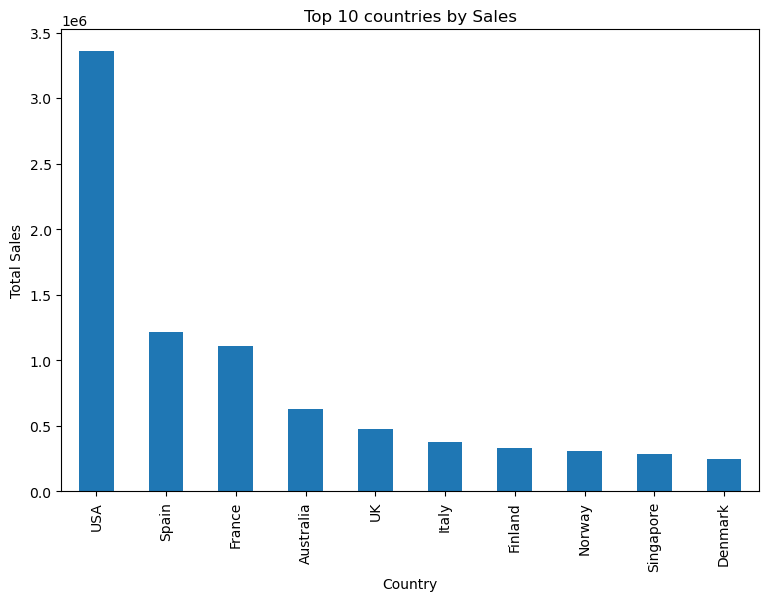

In [14]:
#Top 10 countries
plt.figure(figsize=(9,6))
top_cities = df.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind = 'bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

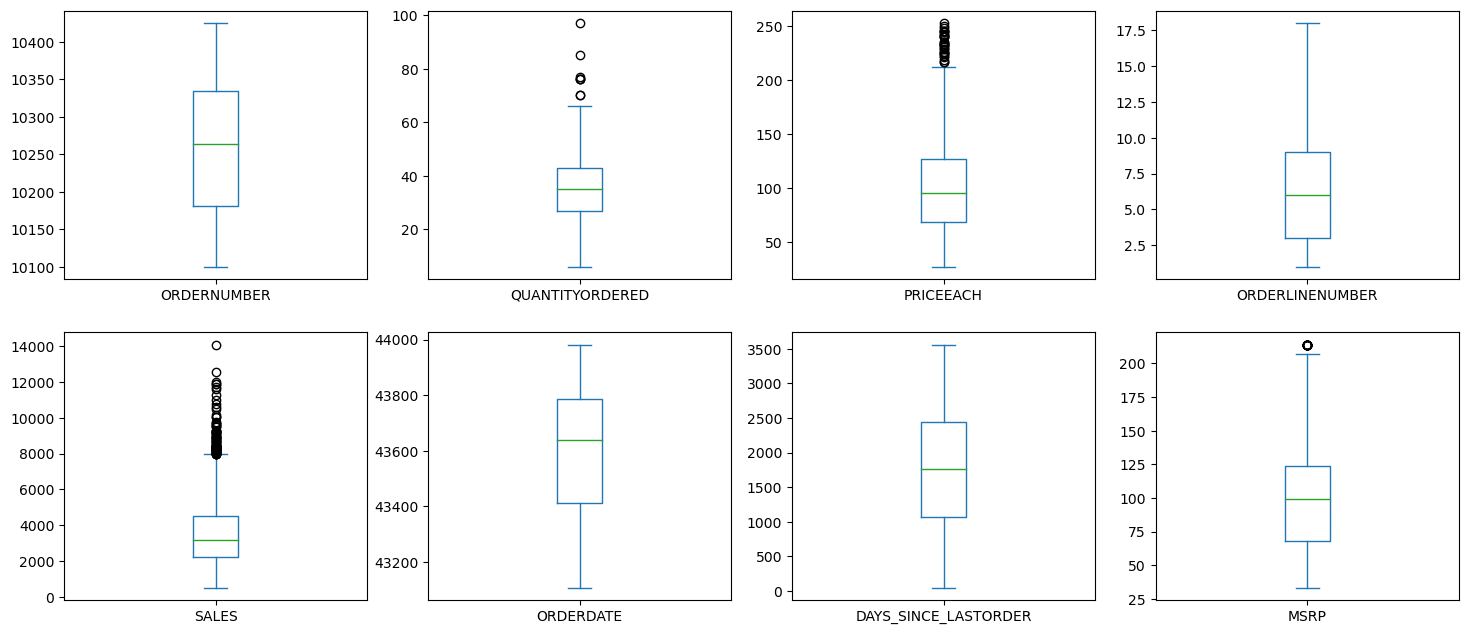

In [15]:
#Box plots for numeric value
plt.rcParams['figure.figsize'] = [18, 16]
df.plot(kind="box",subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

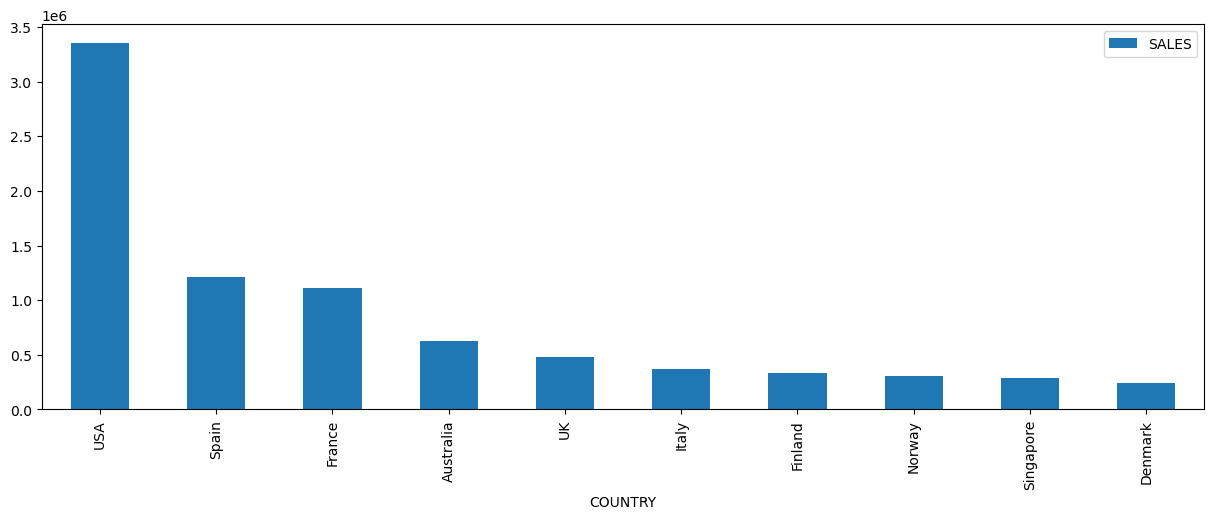

In [16]:
#Bivariate Analysis - Country vs Sales
df.groupby(by=['COUNTRY'])['SALES'].sum().reset_index().sort_values(['SALES'],
                    ascending=False).head(10).plot(x='COUNTRY',y='SALES',kind='bar', figsize=(15,5))

plt.show()

<AxesSubplot:xlabel='QUANTITYORDERED', ylabel='SALES'>

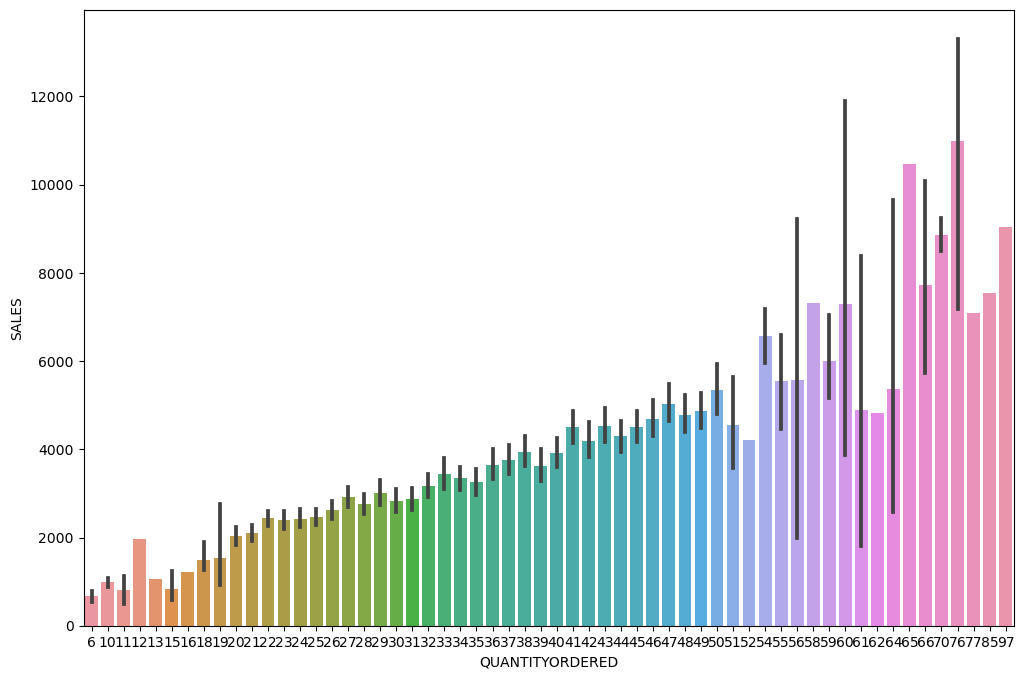

In [17]:
#Bivariate Analysis - Quantity ordered vs Sales
plt.figure(figsize=(12,8))  # setting the figure size
sns.barplot(x='QUANTITYORDERED', y='SALES', data=df)

<AxesSubplot:xlabel='MSRP', ylabel='SALES'>

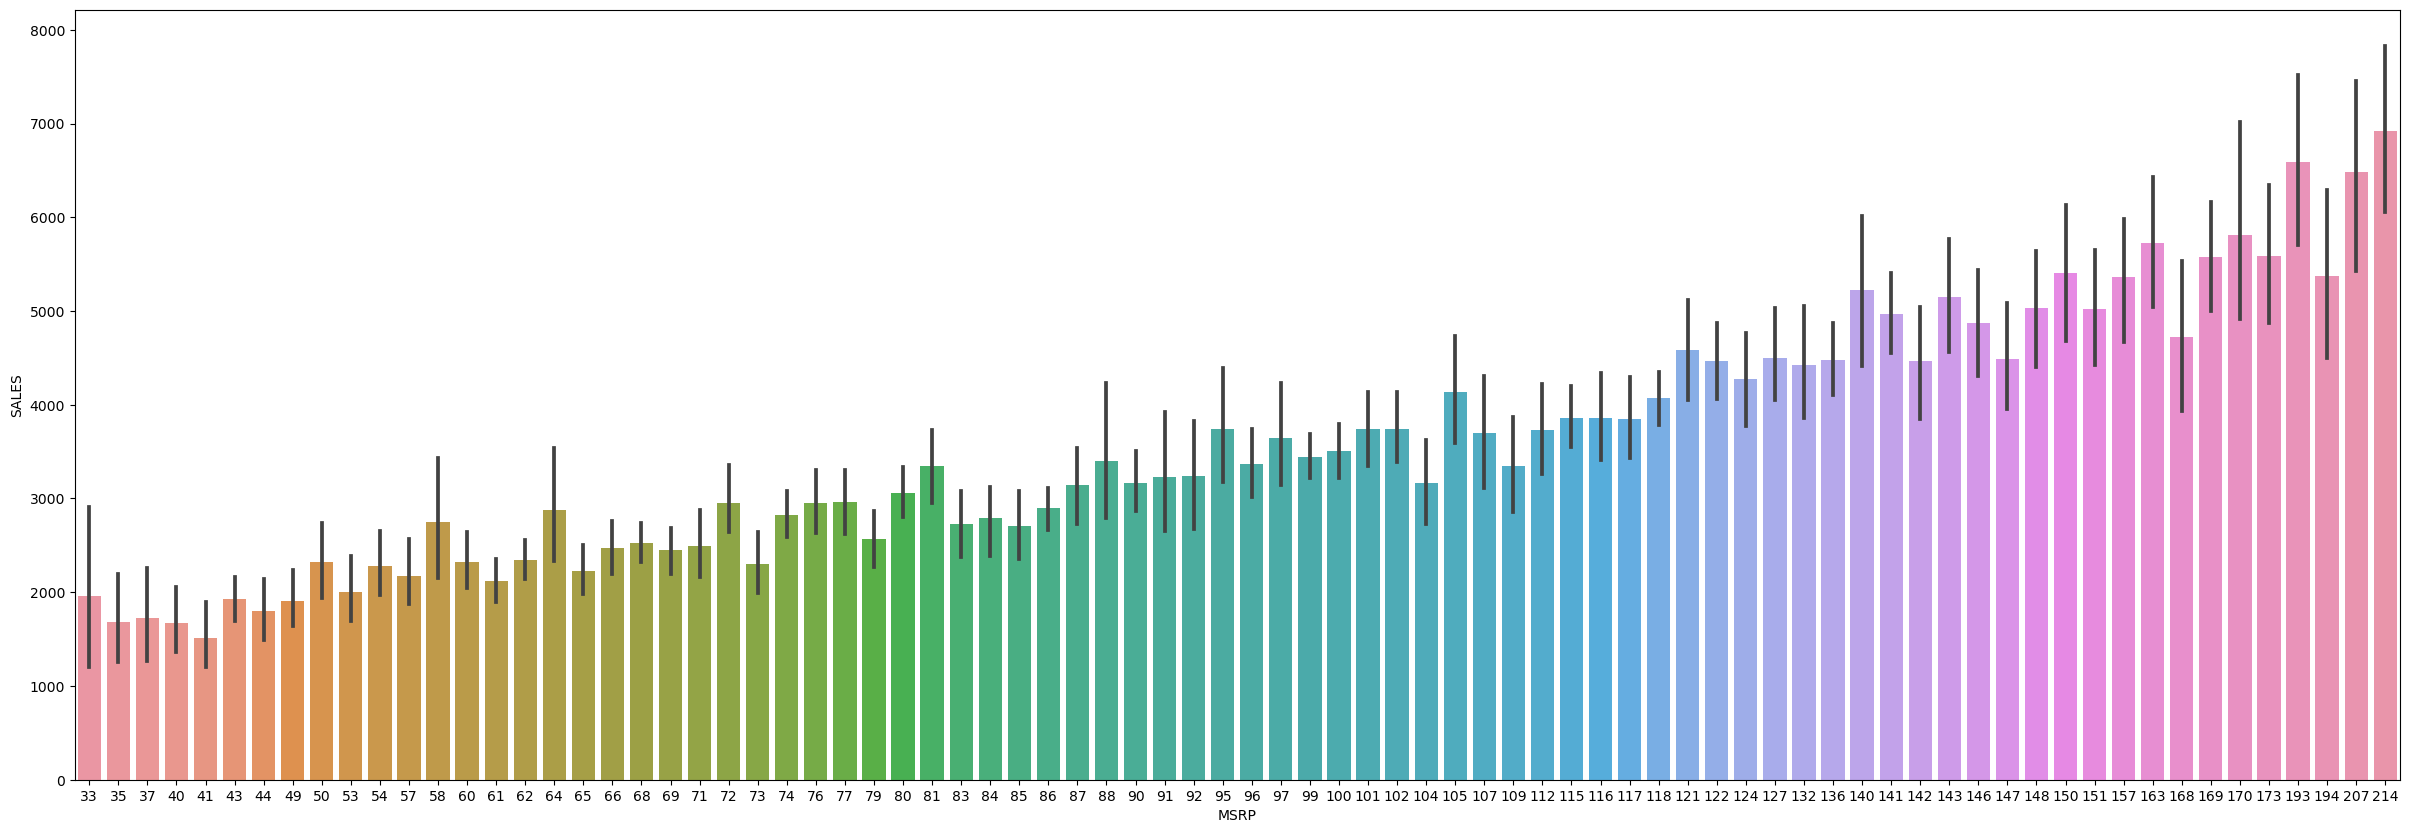

In [18]:
#Bivariate Analysis - MSRP vs Sales
plt.figure(figsize=(30,10))
sns.barplot(x="MSRP", y="SALES", data=df)

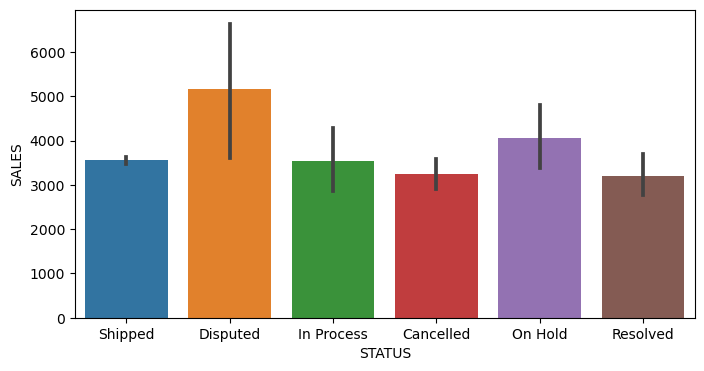

In [19]:
#Bivariate Analysis - Status vs Sales
plt.figure(figsize=(8,4))
ax = sns.barplot(x="STATUS", y="SALES", data=df)

<AxesSubplot:xlabel='PRODUCTLINE', ylabel='SALES'>

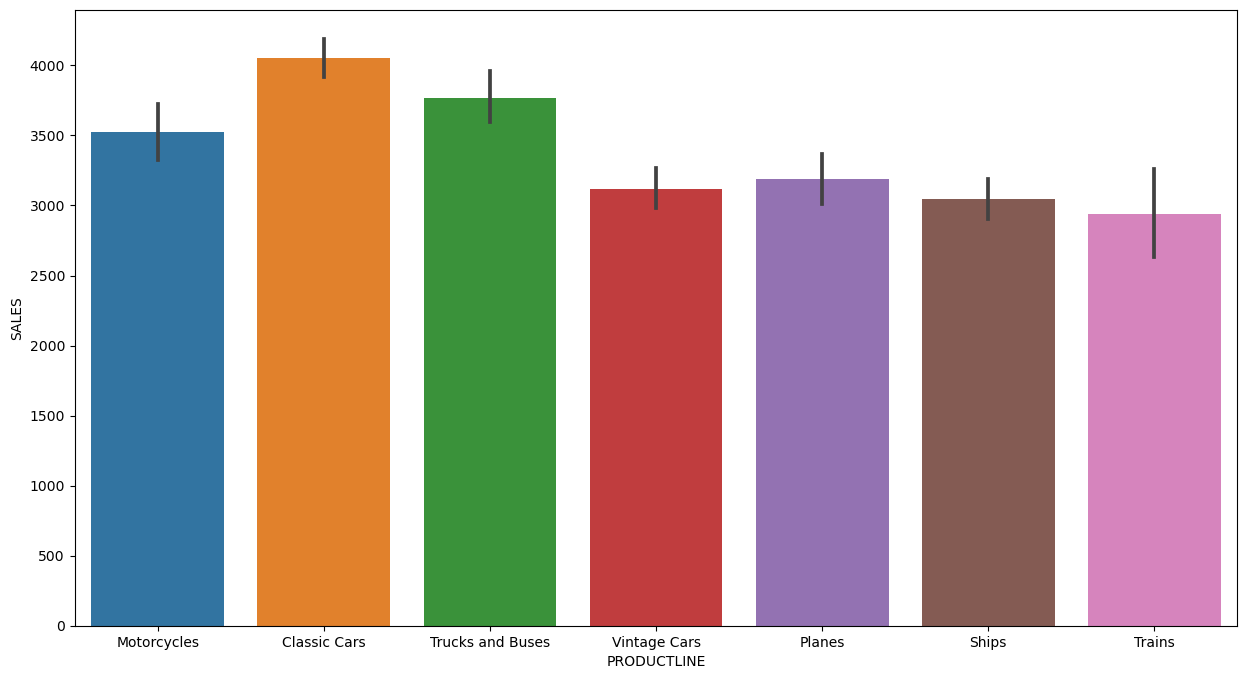

In [20]:
#Bivariate Analysis - Product Line vs Sales
plt.figure(figsize=(15,8))
sns.barplot(x="PRODUCTLINE", y="SALES", data=df)

<AxesSubplot:xlabel='DEALSIZE', ylabel='SALES'>

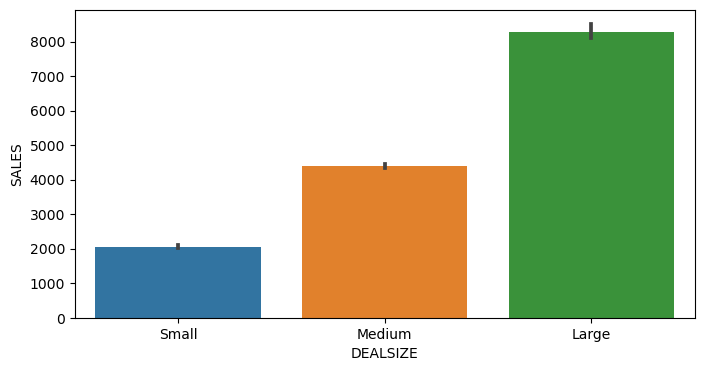

In [21]:
#Bivariate Analysis - Dealsize vs Sales
plt.figure(figsize=(8,4))
sns.barplot(x="DEALSIZE", y="SALES", data=df)